<a href="https://colab.research.google.com/github/Sam1522/Handled-Projects-/blob/main/Autolib_Hypothesis_Testing_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Hypothesis Testing for Autolib Electric Car-sharing Service Company Data**

##**1.0** **Introduction**
Autolib car sharing is a public car sharing program of eco-friendly electric **Bluecars** that was deployed in Paris in 2011 as a traffic option to complement existing bike sharing service,Velib

Autolib Car sharing Service Company supplies electric cars and stations where users can subscribe, pick up or drop off the cars, provides parking spaces, charging points reserved exclusively for **Bluecars**. 

Autolib greatly contributes environment preservation and facilites mobility in Paris.

#### 1.1 Main Objective

The main objective of this project is to investigate a claim about the blue cars.

#### 1.2 Specifying the problem statement

In order to achieve our objective,we first state our null and alternative hypothesis;

* Null hypothesis: The sum of blue cars taken on weekend is equal to the sum blue cars returned

* Alternative hypothesis: The sum of blue cars taken on weekend is not equal to the sum blue cars returned between January 2018 and March 2018





####  1.3 Defining the Metric for Success

The main objective of this project is to investigate Alternative hypothesis: **The sum of blue cars taken on weekend is not equal to the sum blue cars returned** . We have identified weekends as our periods of interest.


####  1.4 Understanding the context 
Sum of electric cars taken and returned are reported on a daily basis. The columns of the data set are:

**postal_code**:	postal code of the area (in Paris)

**date**:	date of the row aggregation

**n_daily_data_points**: number of daily data points  that were available for aggregation,that day

**day_of_week**:	identifier of weekday (0: Monday -> 6: Sunday)

**day_type**:	weekday or weekend

**bluecars_taken_sum**:	Number of bluecars taken that date in that area

**bluecars_returned_sum**:	Number of bluecars returned that date in that area

**utilib_taken_sum**:	Number of Utilib taken that date in that area

**utilib_returned_sum**:	Number of Utilib returned that date in that area

**utilib_14_taken_sum**:	Number of Utilib 1.4 taken that date in that area

**utilib_14_returned_sum**:	Number of Utilib 1.4 returned that date in that area

**slots_freed_sum	Number**: of recharging slots released that date in that area

**slots_taken_sum**:	Number of rechargign slots taken that date in that area

Link to the dataset https://bit.ly/DSCoreAutolibDataset


####  1.5 Experimental Design taken

To work on this project, we will follow the following procedure






a)   Understanding Autolib Car sharing service company business i.e the industry it operates in


b)   Understand the the data provided by loading the data


c) Clean and explore our data using python


d) Perfom univariate and bivariate analysis


e) Hypothesis testing and implement the solution



####  1.6 Data Relevance and Validation

The data is reported on a daily basis covering the period from January 1, 2018 through June 19, 2018 which is sufficient for our analysis

## **2.0** **Data** **Understanding**

####  2.1  Importing libraries

Before we dive into the Autolib data, let’s first import the relevant libraries

In [ ]:
import pandas as pd #used to analyze data
import numpy as np #used for working with arrays
import seaborn as sns #helps you explore and understand your data using stattistical graphs, it is built on matplotlib
import matplotlib #used for creating interactive visualizations 
from matplotlib import pyplot as plt #API for matplotlib and is used for graphic visualizations

#### 2.2 Reading the dataset

In [ ]:
# we use the read_csv() function to read the data into a DataFrame
data = pd.read_csv('/content/autolib_daily_events_postal_code.csv')
data



,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


In [ ]:
data.shape #getting the number of entries in the dataset:
print("The dataset contains {} rows, and {} columns".format(data.shape[0], data.shape[1]))

The dataset contains 16085 rows, and 13 columns


In [ ]:
data.head(3) #displaying first three columns

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27


In [ ]:
data.tail(3)#displaying last three columns

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


**Observation**

The DataFrame has 16085 rows, covering the period from January 1, 2018 through June 19, 2018. To see what the data looks like, we've used the head() and tail() methods to display the first three and last three rows.

## 3.0 Data Cleaning

let’s check out the data types of each column.

In [ ]:
data.dtypes 

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

Our columns are in their correct data types

In [ ]:
data.columns #checking column names

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [ ]:
# The column names are not in the correct format, before modification, we need to make a copy of the original dataset
data_copy = data.copy(deep=True) # Modifications to the data of the copy will not be reflected in the original object
data_copy.head(3) #previewing the first three rows

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27


In [ ]:
# Renaming columns into the right format
col_names = data_copy.columns.tolist()
for col in range(len(col_names)):
  col_names[col] = col_names[col].lower().replace(" ", "_")

data_copy.columns = col_names

In [ ]:
data_copy.columns #confirmimg the column names

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [ ]:
#We want to see the number of null values in the dataset
data_copy.isnull().sum().sum()


0

The dataset columns do not have null values

In [ ]:
# checking for missing values
data_copy.isnull().any()

postal_code               False
date                      False
n_daily_data_points       False
dayofweek                 False
day_type                  False
bluecars_taken_sum        False
bluecars_returned_sum     False
utilib_taken_sum          False
utilib_returned_sum       False
utilib_14_taken_sum       False
utilib_14_returned_sum    False
slots_freed_sum           False
slots_taken_sum           False
dtype: bool

There are no missing values in the dataset

In [ ]:
# checking for duplicates
data_copy.duplicated().any()

False

There are no duplicates in the dataset

In [ ]:
#in formulating our null hypothesis, we chose to work with data with weekend data only

In [ ]:
data_copy1 = data_copy[data_copy.day_type == 'weekend'] #extracting weekend data
data_copy1.head(5) #displayomg first five columns

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
5,75001,1/6/2018,1437,5,weekend,187,185,6,6,7,8,38,35
6,75001,1/7/2018,1440,6,weekend,180,180,2,2,10,9,34,34
12,75001,1/13/2018,1440,5,weekend,224,223,2,2,15,15,38,38
13,75001,1/14/2018,1440,6,weekend,193,193,2,2,12,12,22,20
19,75001,1/20/2018,1439,5,weekend,217,217,2,2,25,25,41,39


In [ ]:
data_copy1.shape #getting the number of rows and columns in our data set

(4541, 13)

Checking summary statistics

In [ ]:
data_copy1.describe(include = 'all')

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
count,4541.000000,4541,4541.000000,4541.000000,4541,4541.000000,4541.000000,4541.000000,4541.000000,4541.000000,4541.000000,4541.000000,4541.000000
unique,NaN,44,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,5/26/2018,NaN,NaN,weekend,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,104,NaN,NaN,4541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,88794.686633,NaN,1434.694781,5.500771,NaN,151.090068,152.029289,4.393085,4.414666,10.129707,10.184761,26.909712,26.970932
std,7646.521844,NaN,20.819324,0.500054,NaN,218.565642,221.140337,6.747905,6.834645,14.821601,14.973810,61.357605,61.531368
min,75001.000000,NaN,1318.000000,5.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,NaN,1440.000000,5.000000,NaN,25.000000,24.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,NaN,1440.000000,6.000000,NaN,59.000000,58.000000,2.000000,2.000000,4.000000,4.000000,0.000000,0.000000
75%,93400.000000,NaN,1440.000000,6.000000,NaN,156.000000,157.000000,5.000000,5.000000,11.000000,12.000000,6.000000,6.000000


**Observation**

The describe function has returned a summary  central tendency, dispersion, and shape of our dataset’s distribution for both numerical and categorical columns



*   Detecting outliers




In [ ]:
#defining a function to detect outliers
blue_cars_taken = data_copy1['bluecars_taken_sum']
outliers = []
def detect_outliers(blue_cars):
  mean = blue_cars_taken.mean()
  stdev = blue_cars_taken.std()
  threshold = 3
  for y in blue_cars_taken:
    z_score = (y - mean) / stdev
  if z_score > threshold:
    outliers.append(y)
  return outliers
detect_outliers(data_copy1['bluecars_taken_sum']) #testing for outliers for bluecars taken sum

[]

In [ ]:
detect_outliers(data_copy1['bluecars_returned_sum'])  #testing for outliers for bluecars returned sum

[]

Our dataset does not have outliers

##3.0)Univariate Analysis

##### **i**)**Using** **Histograms**

Histograms are a great for visualizing and analyzing numerical continous data. We are going to plot histograms to analyze the sum of blue cars taken and blue cars returned.

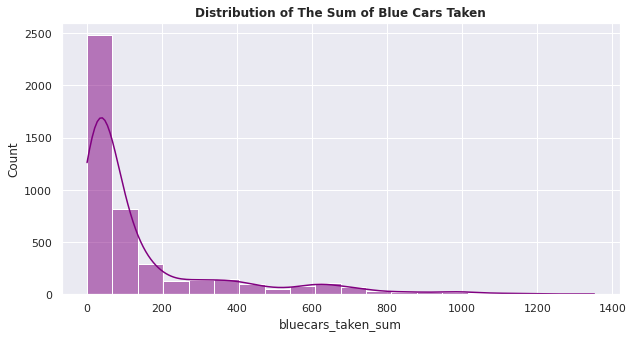

In [ ]:
sns.histplot(data_copy1 ['bluecars_taken_sum'], kde = True, bins = 20, color = 'purple');
plt.title('Distribution of The Sum of Blue Cars Taken', fontweight = 'bold');
sns.set(rc = {'figure.figsize':(10,4)})

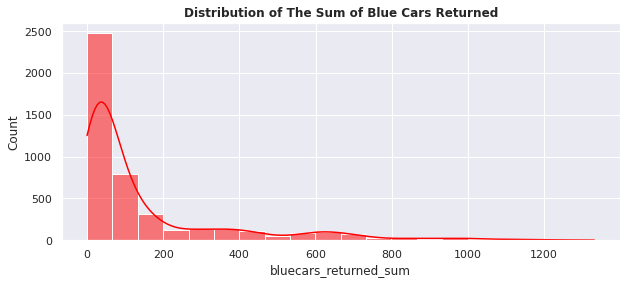

In [ ]:
sns.histplot(data_copy1['bluecars_returned_sum'], bins = 20,kde = True, color = 'red');
plt.title('Distribution of The Sum of Blue Cars Returned', fontweight = 'bold');
sns.set(rc = {'figure.figsize':(10,4)})


**Observation**


From the above histograms, we can see that the highest total number of the blue cars taken and returned  are  between 0 and 200 cars.  

Our distribution is skewed to the right. This is caused by extreme values far from the peak on the high end.

**Testing** **for** **skewness**

In [ ]:
data_copy1['bluecars_taken_sum'].skew()

2.3007208190452824

In [ ]:
data_copy1['bluecars_returned_sum'].skew()

2.282127757634861

**Observation**
Skewness is the measure of assymetry in a probability distribution. It can either be positive or negative.

The rule of thumb is;

If the skewness is between -0.5 and 0.5, the data are fairly symmetrical. If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data is moderately skewed. If the skewness is less than -1 or greater than 1, the data are highly skewed.

The output shows that distribution is positively and highly skewed

**Testing** **for** **Kurtosis**


In [ ]:
data_copy1['bluecars_taken_sum'].kurt()

5.295039714140337

In [ ]:
data_copy1['bluecars_returned_sum'].kurt()

5.130919547662399

**Observation**
Kurtosis tests whether the data are heavy-tailed or light-tailed relative to a normal distribution.

If the number is greater than +1, the distribution is too peaked. Likewise, a kurtosis of less than –1 indicates a distribution that is too flat

Our output is greater than zero showing the distribution has a high degree of peakness.

Getting propotion of days in Weekends

In [ ]:
# get proportion of weekend days
# data_copy1['dayofweek'].value_counts(normalize=True)*100
data_copy1['dayofweek'].value_counts()


6    2274
5    2267
Name: dayofweek, dtype: int64

##### **iii**) **Using** **Barplot**


We are going to analyze the sum of blue cars taken and returned on weekends using bar plots which are commonly used for representing categorical data with  using rectangular bars with value counts of the categorical values

From the dataset, the days of the week are coded with 5 being saturday and 6 being sunday. we have 2267 values for saturday and 2274 values for sunday

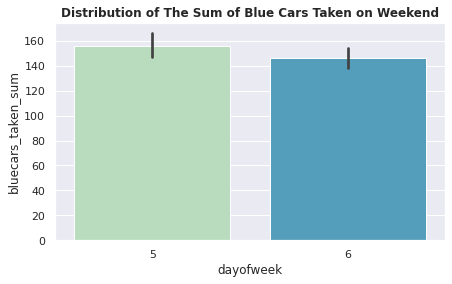

In [ ]:
sns.barplot(data= data_copy1, y="bluecars_taken_sum", x="dayofweek", palette = "GnBu");
plt.title('Distribution of The Sum of Blue Cars Taken on Weekend', fontweight = 'bold');
sns.set(rc = {'figure.figsize':(10,4)})

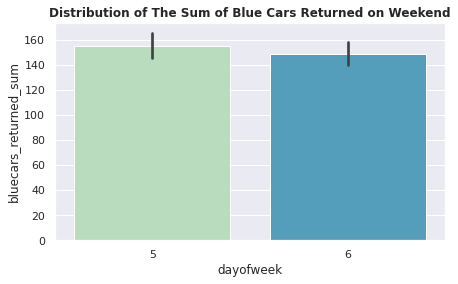

In [ ]:
sns.barplot(data=data_copy1, y="bluecars_returned_sum", x="dayofweek", palette = "GnBu");
plt.title('Distribution of The Sum of Blue Cars Returned on Weekend', fontweight = 'bold');
sns.set(rc = {'figure.figsize':(5,4)})

**Observation**

From the above visualizations, we can see that we have two days on weekend coded as 5 and 6. The bar plot shows comparisons among these discrete categories, with the x-axis showing the specific categories and the y-axis the measured value which is the sum of blue cars taken in the first bar plot and the sum of blue cars returned in the second bar plot.

**Interpretation**


*   More cars are taken on day 5 compared to day 6
*   More cars are returned on day 5 compared to day 6









## 4.0) Bivariate Analysis

Studying the relationship between the sum of blue cars taken and sum of blue cars returned

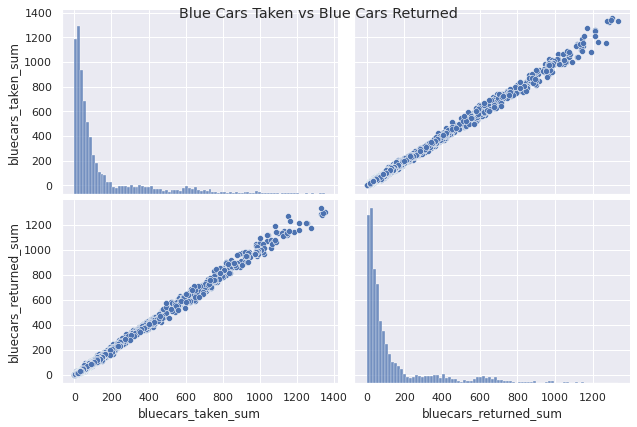

In [ ]:
pp = sns.pairplot(data_copy1[['bluecars_taken_sum','bluecars_returned_sum']], height= 3, aspect= 1.5)
pp.fig.suptitle("Blue Cars Taken vs Blue Cars Returned");



**Observation**



1.   There is a perfect positive relationship between the sum of blue cars taken and sum of blue cars returned. This means that the sum of blue cars returned changes positively in the same ratio as the sum of blue cars taken

2.   There is a negative non linear relationship between;

      a) Blue cars taken 
      
      b) Blue cars returned



b) Line Plot

With time-based indexing, we can use date/time formatted strings to select data in our DataFrame with the loc accessor

After setting our date as the index, we can select data from Jan to march

**Regression** **Analysis**

Measuring the strength of the relationship between the sum of blue cars taken and sum of blue cars returned on weekends

In [ ]:
pearson_coeff = data_copy1["bluecars_taken_sum"].corr(data_copy1["bluecars_returned_sum"], method="pearson") 
print(pearson_coeff)


0.9985777392530121


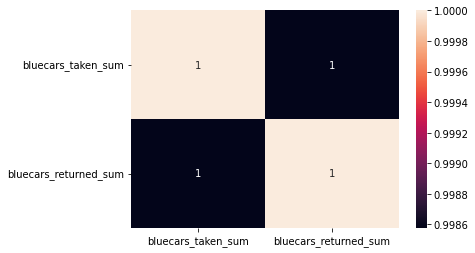

In [ ]:
# Heat map showing the correlation of variables
sns.heatmap(data_copy1[['bluecars_taken_sum', 'bluecars_returned_sum']].corr(), annot=True);


This means that **bluecars_taken_sum** and **bluecars_returned_sum** are strongly correlated.

## 5.0) Hypothesis testing and implementing the solution

We have used simple random sampling technique to pick the desired sample size

### i) Sampling

In [ ]:
#getting a sample size of 500 variables
data_copy1_sample = data_copy1.sample(n = 500, replace="False")
data_copy1_sample.head(3)

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
5979,92200,2/24/2018,1396,5,weekend,1,3,0,0,0,0,0,0
1179,75008,4/1/2018,1440,6,weekend,338,351,13,11,25,22,102,104
11660,93360,1/14/2018,1440,6,weekend,33,28,2,1,0,0,0,0


In [ ]:
#confirming the number of variables in our dataset
data_copy1_sample.shape

(500, 13)

### ii) Hypothesis testing

In [ ]:
#we begin by calucating the population mean for the sum of blue cars taken and blue cars returned

In [ ]:
bluecars_taken_pop_mean  = data_copy1['bluecars_taken_sum'].mean()
bluecars_taken_pop_mean

151.09006826690157

In [ ]:
#after getting the population mean for both variables, we now compute the sample mean

In [ ]:
bluecars_taken_sample_mean  = data_copy1_sample['bluecars_taken_sum'].mean()
bluecars_taken_sample_mean

161.378

In [ ]:
#the next step is computing the sample standard deviation

In [ ]:
bluecars_taken_std_dev  = data_copy1_sample['bluecars_taken_sum'].std()
bluecars_taken_std_dev

220.20050781795797

In [ ]:
#The next step is now calculating the z score

In [ ]:
zscore = z = (bluecars_taken_sample_mean - bluecars_taken_pop_mean) / bluecars_taken_std_dev
zscore

0.0467207448113769

In [ ]:
# Calculating the p value
import scipy.stats as stats
from scipy.stats import norm
p_value = stats.norm.cdf(z)
p_value


0.5186321017850761

In [ ]:
# Intepreting the p value
# we chose  alpha = 0.05 or 5%
alpha = 0.05
if p_value > alpha:
  print('We fail to reject the null hypothesis')
else:
  print('We reject the null hypothesis')

We fail to reject the null hypothesis


### iii) Implementing the solution


* Our p-value of 0.51 is greater than the significance
level. Therefore, we fail to reject the null hypothesis.
